In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
from keras_preprocessing.image import load_img

In [ ]:
train_directory='/content/drive/MyDrive/Dataset/Train'
val_directory='/content/drive/MyDrive/Dataset/Validation'
test_directory='/content/drive/MyDrive/Dataset/Test'

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 270 images belonging to 3 classes.
Found 32 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Negative': 0, 'Positive': 1, 'neutral': 2}

In [ ]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

171317808/171317808 [==============================] - 1s 0us/step


In [ ]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              205522944 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [ ]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
2/2 [==============================] - 109s 24s/step - loss: 6.4893 - accuracy: 0.0296 - val_loss: 50.0908 - val_accuracy: 0.2812
Epoch 2/5
2/2 [==============================] - 93s 87s/step - loss: 1.1537 - accuracy: 0.9037 - val_loss: 65.6168 - val_accuracy: 0.2188
Epoch 3/5
2/2 [==============================] - 89s 14s/step - loss: 0.5878 - accuracy: 0.9370 - val_loss: 71.1517 - val_accuracy: 0.1562
Epoch 4/5
2/2 [==============================] - 90s 84s/step - loss: 0.0926 - accuracy: 0.9815 - val_loss: 68.0574 - val_accuracy: 0.1562
Epoch 5/5
2/2 [==============================] - 100s 15s/step - loss: 0.0624 - accuracy: 0.9889 - val_loss: 64.2614 - val_accuracy: 0.2188


In [ ]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=1)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


2/2 [==============================] - 110s 17s/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 56.8677 - val_accuracy: 0.1562


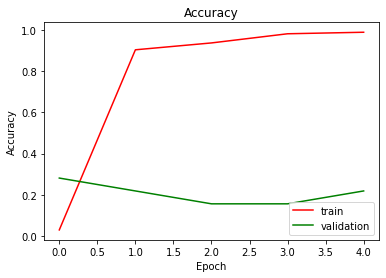

In [ ]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

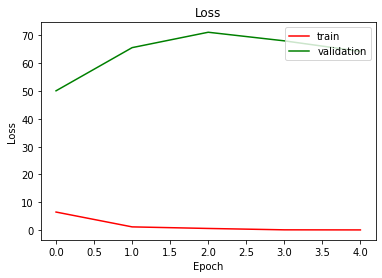

In [ ]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
model.evaluate(test_gemerator)

1/1 [==============================] - 8s 8s/step - loss: 4.9469 - accuracy: 0.7000


[4.946862697601318, 0.699999988079071]

In [ ]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))

    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    print (probability, ' % chances are there that the Emoji Is',icd[answer[0]])

TypeError: ignored

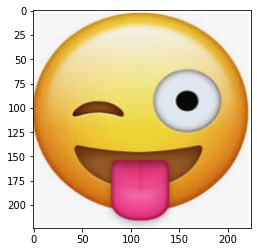

In [ ]:
img='/content/drive/MyDrive/Dataset/Test/Positive/happy12.jpg'
pic=load_img('/content/drive/MyDrive/Dataset/Test/Positive/happy12.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)